<a href="https://colab.research.google.com/github/PawixTheGreat267/Machine-Learning-/blob/main/Astronomical_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!kaggle datasets download -d deepu1109/star-dataset

  0% 0.00/3.16k [00:00<?, ?B/s]
100% 3.16k/3.16k [00:00<00:00, 8.58MB/s]


In [ ]:
import zipfile
file_path = '/content/drive/MyDrive/kaggle/DataSets/Stars/stars.zip'

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle/DataSets/Stars')

In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data_star = pd.read_csv('/content/drive/MyDrive/kaggle/DataSets/Stars/6 class csv.csv')

In [ ]:
print(data_star)

     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

     Star type Star color Spectral Clas

In [ ]:
data_star.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [ ]:
data_star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


check general information about the dataframe


In [ ]:
#Create a directory to save visualizations

folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok=True)

base_dir = f'/content/{folder_name}/'

Visualize the count of stars for each type of stars


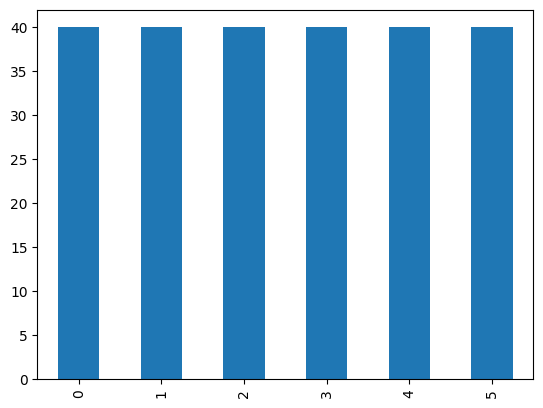

In [ ]:
#first plotting of the visualization using matpotlib
data_star['Star type'].value_counts().plot(kind='bar')
plt.show()

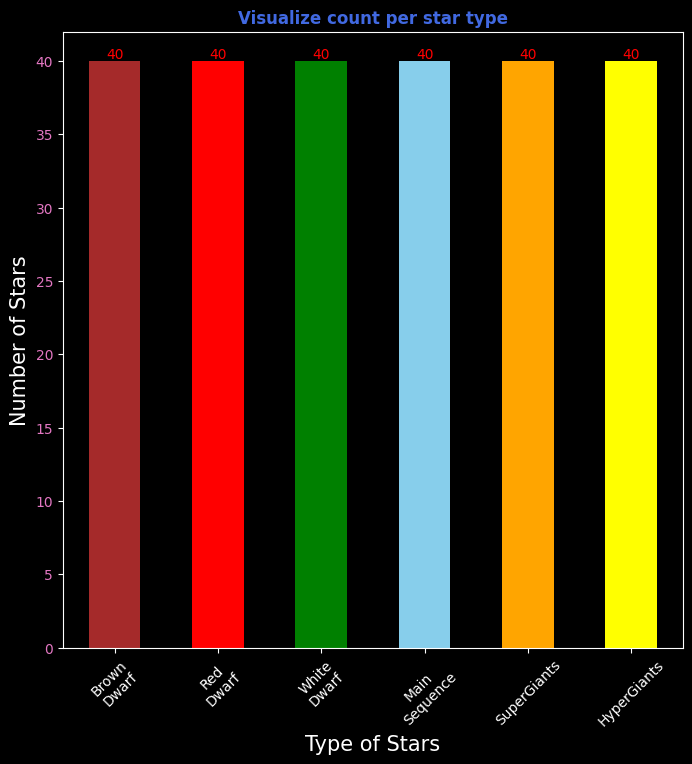

In [ ]:
plt.figure(figsize=(8,8)) #para ma change nimo ang size sa imong figure or graph
plt.style.use('dark_background') #background sa imong graph
ax = data_star['Star type'].value_counts().plot(kind='bar', color =['brown', 'red', 'green', 'skyblue', 'orange', 'yellow']) #imong data gi himong variable aron ma configure
ax.bar_label(ax.containers[0], color = 'red') #gi configure na ang mga containers para naay count which is 40 tanan
plt.title('Visualize count per star type', color='royalblue', weight = 'bold') #pwede nimo butngan ug title imong graph
plt.yticks(color='tab:pink') #yticks meaning ang mga ngalan sa imong y-axis
plt.ylabel('Number of Stars', color='white', fontsize=15) #pwede nimo butngan ug label imong y-axis
plt.xticks(ticks=[0,1,2,3,4,5], labels = ['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence', 'SuperGiants', 'HyperGiants'], rotation=45, color='white') #gi configure ang x-axis
plt.xlabel('Type of Stars', fontsize=15, color='white') #gi butngan ug ngalan ang label sa x-axis
plt.savefig(base_dir+'barplot_star_count.png') #dre imo nang gi-save ang imong graph didto sa folder location na imong gi create
plt.show() #mao ni para mu-show ang graph

This graph is created using Matplotlib


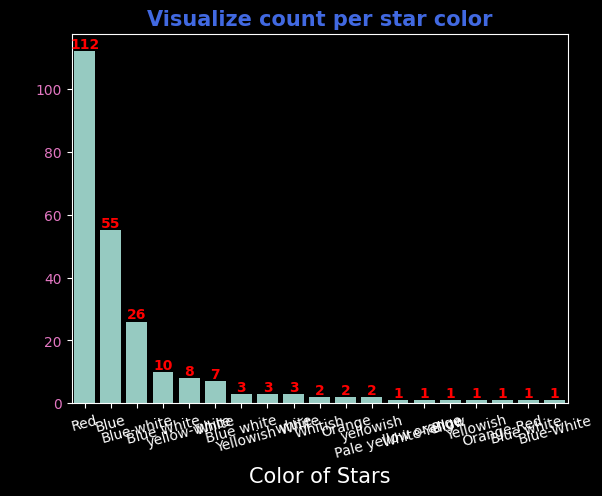

<Figure size 2000x800 with 0 Axes>

In [ ]:
#Bar Graph using Seaborn
ax=sns.barplot(x=data_star['Star color'].value_counts().index,
               y=data_star['Star color'].value_counts())
ax.bar_label(ax.containers[0], color='red', weight='bold')
plt.title('Visualize count per star color', color='royalblue', weight='bold', fontsize=15)
plt.xticks(rotation=15, color='white')
plt.xlabel('Color of Stars', fontsize=15, color='white')
plt.yticks(color='tab:pink')
plt.ylabel('How many stars belong to color', fontsize=15, color='black')
plt.figure(figsize=(20,8))
plt.show()







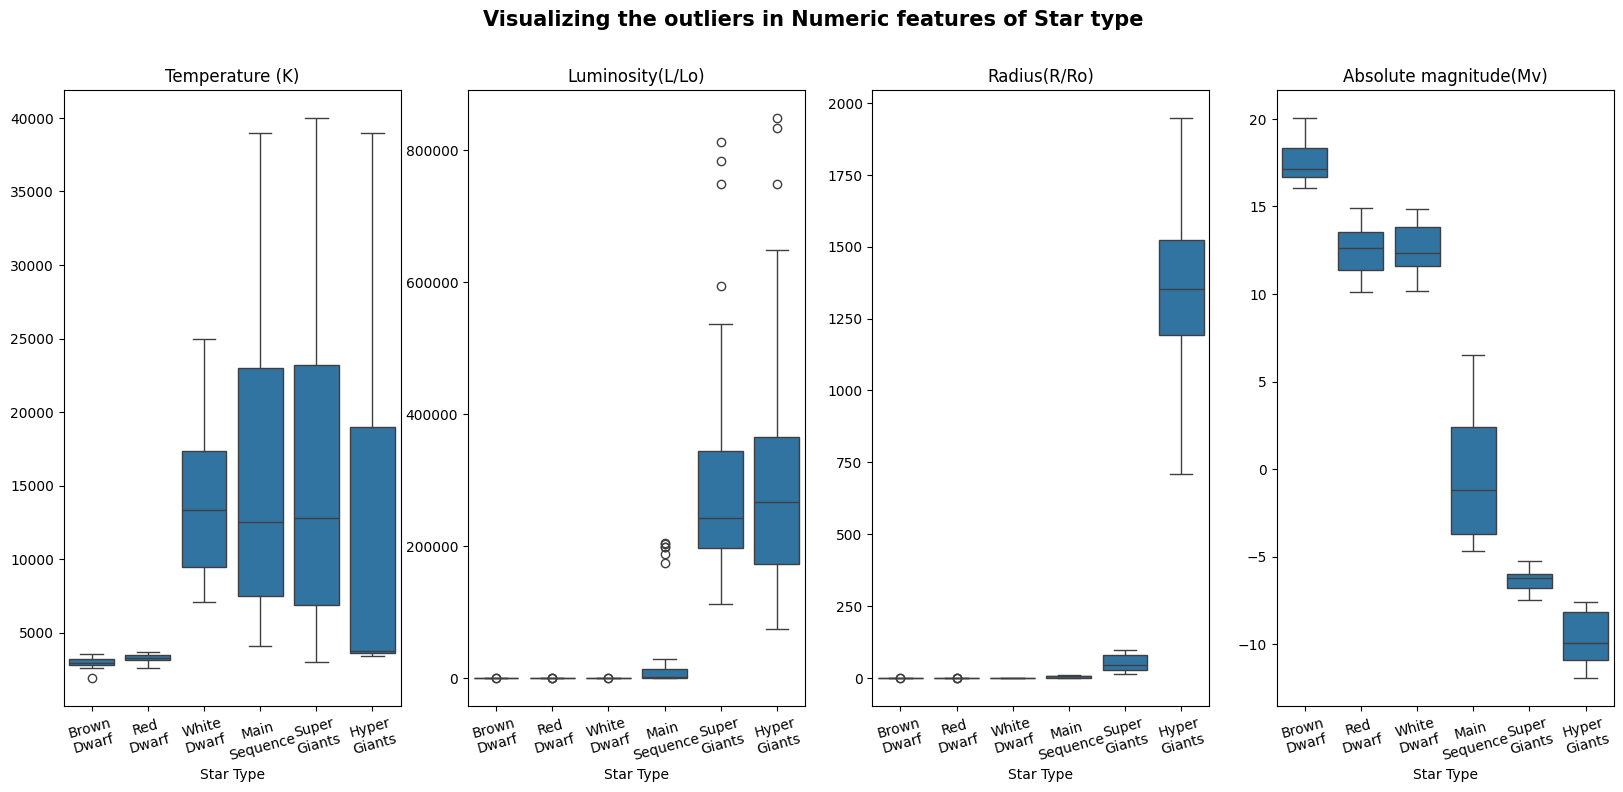

In [ ]:
#Creating many different kinds of graph using looping
plt.figure(figsize=(20,8))
plt.style.use('default')
plt.suptitle('Visualizing the outliers in Numeric features of Star type', color='black', weight='bold',fontsize=15)

ax=data_star['Star type'].value_counts()

for i in range(4):
  plt.subplot(1,4,i+1)
  sns.boxplot(x=data_star['Star type'], y=data_star.iloc[:,i])
  plt.title(data_star.columns[i], color='black')
  plt.xticks(ticks=[0,1,2,3,4,5], labels=['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence', 'Super\nGiants', 'Hyper\nGiants'], rotation=15, color='black')
  plt.xlabel('Star Type')
  plt.ylabel('')

plt.savefig(base_dir + 'Visualizing the outliers in Numearic features of Star type.png')


<function matplotlib.pyplot.show(close=None, block=None)>

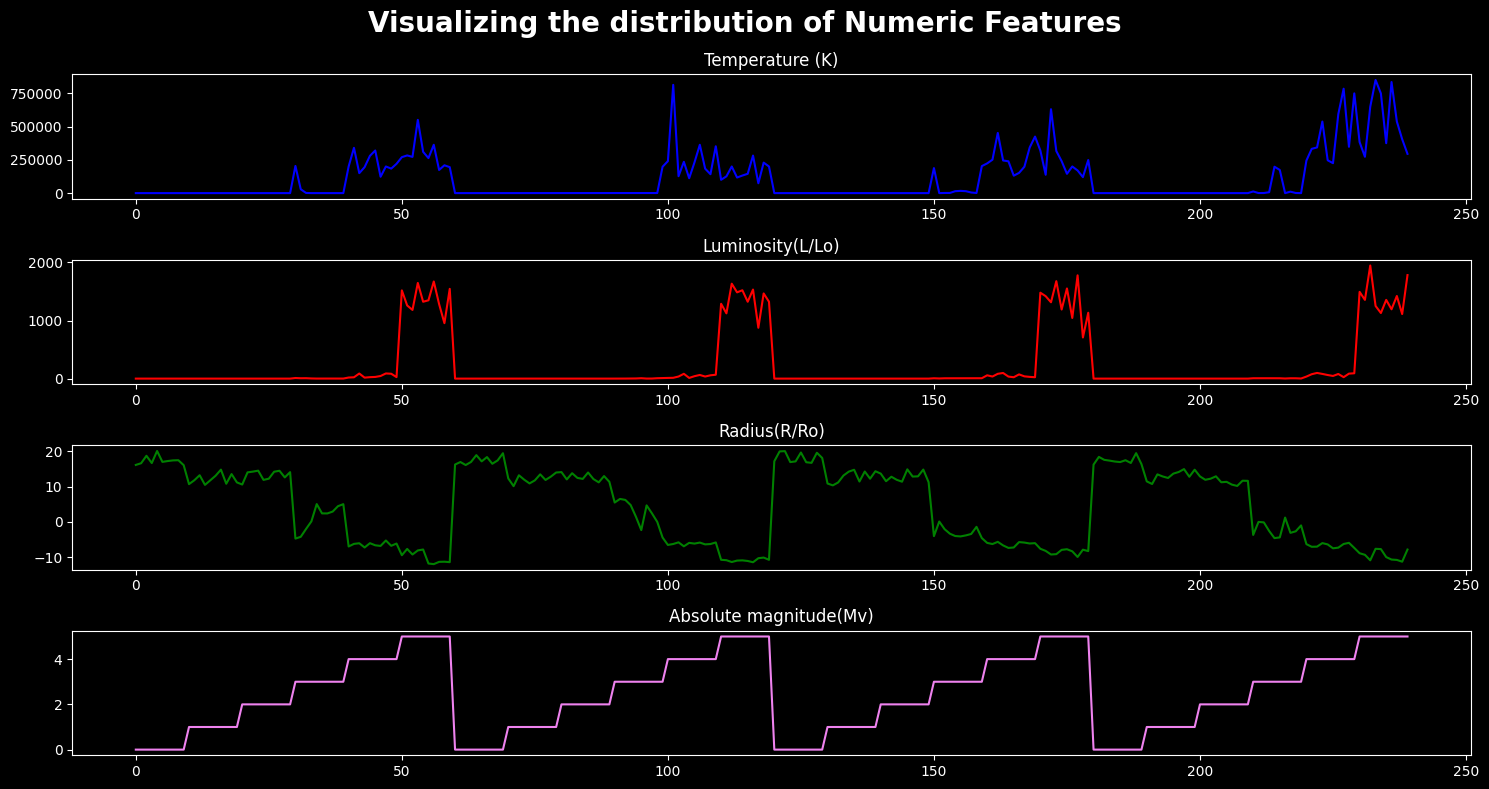

In [ ]:
#Line Plots - basta plotting line, diretso naka mu-plot. Dili pariha sa bar nga magbutang paka nga "bar"

colors= ['blue', 'red', 'green', 'violet']
plt.figure(figsize=(15,8))
plt.suptitle('Visualizing the distribution of Numeric Features', fontsize=20, weight='bold')
plt.style.use('dark_background')
for i in range(4):
  plt.subplot(4,1,i+1)
  plt.plot(data_star.iloc[:,i+1], color=colors[i])
  plt.title(data_star.columns[i], color='white')

plt.tight_layout()
plt.show


In [ ]:
def subplot_function(data_star, colors, i):
  plt.subplot(4,1,i+1)
  plt.plot(data_star.iloc[:,i+1], color=colors[i])
  plt.title(data_star.columns[i], color='white')

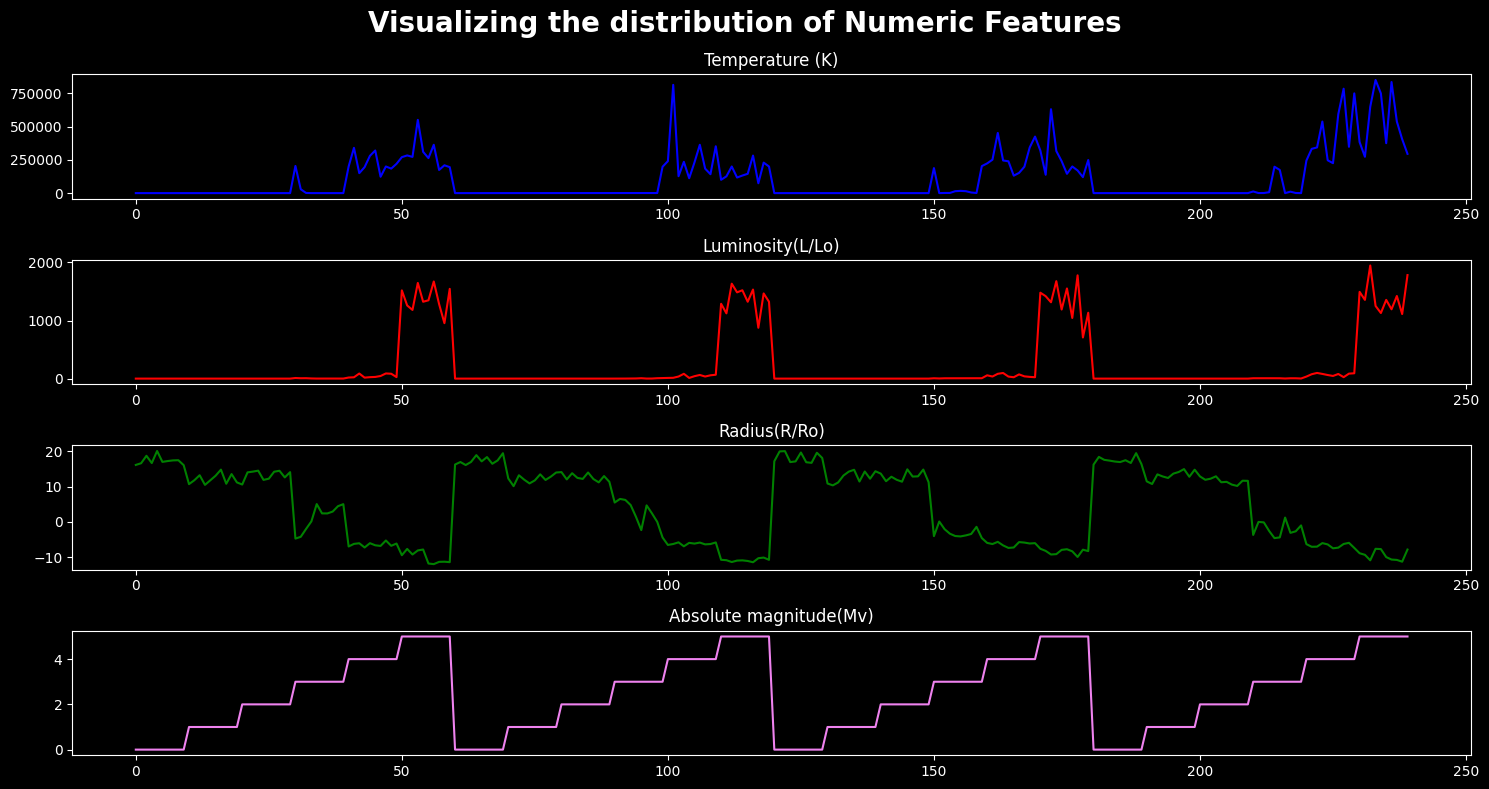

In [ ]:
#using function
colors= ['blue', 'red', 'green', 'violet']
plt.figure(figsize=(15,8))
plt.suptitle('Visualizing the distribution of Numeric Features', fontsize=20, weight='bold')
plt.style.use('dark_background')

for i in range(4):
  subplot_function(data_star, colors, i)

plt.tight_layout()
plt.show

plt.savefig(base_dir + 'Visualizing the distribution of Numeric Features.png')

<function matplotlib.pyplot.show(close=None, block=None)>

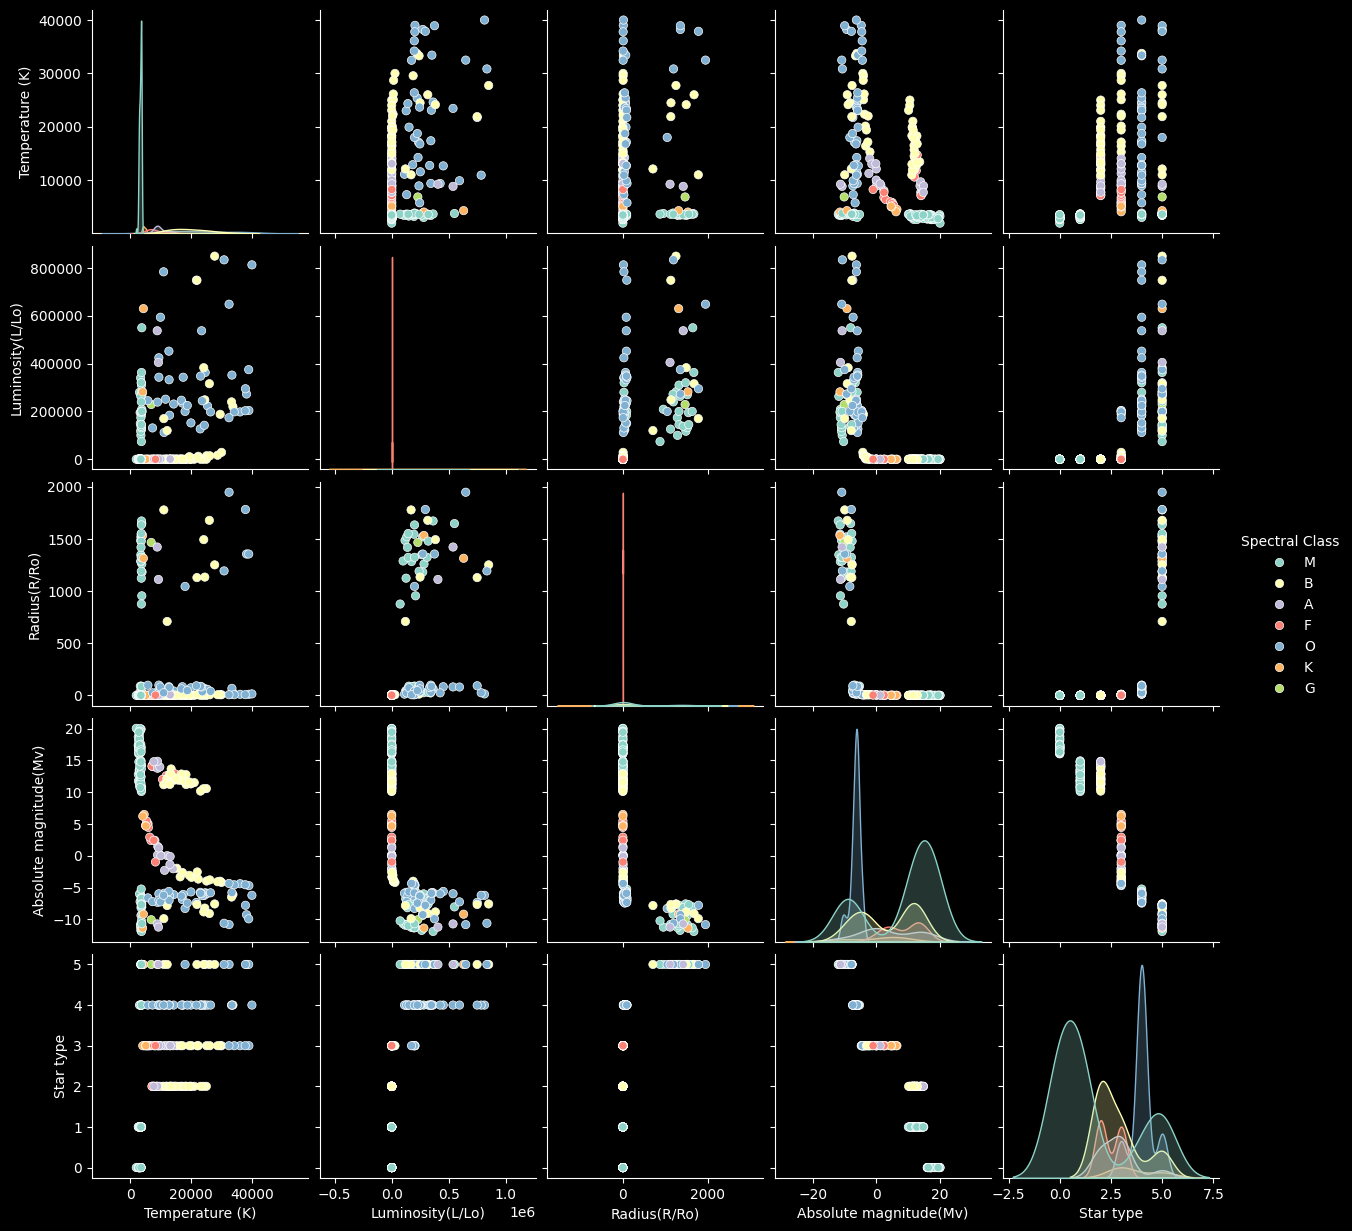

In [ ]:
#Create a pairplot using seaborn
#Ang pulos sa pairplot kay i compare niya tagsa-tagsa each columns with respect sa kung unsa siya na column,
#for example ang temperature gi compare siya with regards sa luminosity,radius and etc

sns.pairplot(data_star, hue='Spectral Class')
plt.savefig(base_dir + 'pairplot.png')
plt.show


In [ ]:
star_types=data_star['Star type'].values #nag create ka ani kay para mao ni nga value which is ang star type ang mugawas didtoa sa plot
temperature = data_star['Temperature (K)'].values #mao ni siya ang value sa imong x-axis
abs_mag = data_star['Absolute magnitude(Mv)'].values #mao ni siya ang value sa imong y-axis


#imoa dayun gi identify each star type depende sa ilang specific categories, take note nga variable rana siya.
#bali kani nga star types kay mao ni ang iyang equivalent identification
#nag create ra ka ug dictionary according sa unsa ni nga star type
star_types = {
    0 : {'label':'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1 : {'label':'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2 : {'label':'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3 : {'label':'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4 : {'label':'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5 : {'label':'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'},
}

In [ ]:
#mao ni ang identifaction nga ang variable na imong gi-set kay na change na, ga input ka sa specific na star_type
star_types[star_type[100]]['color']

'orange'

In [ ]:
len(star_type) #pila kabouk star_type all in all

240

<function matplotlib.pyplot.show(close=None, block=None)>

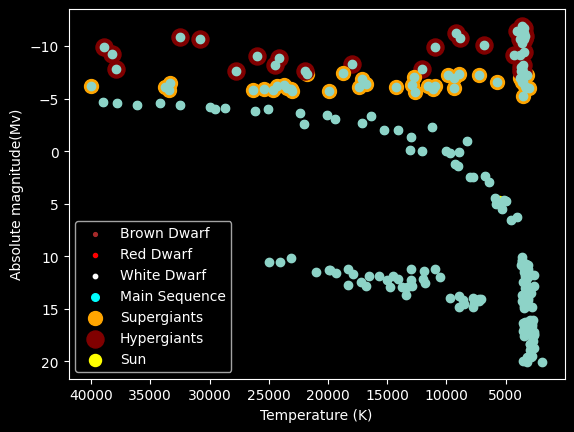

In [ ]:
from typing import ValuesView
#Creating HR Program

axes=[]
labels=set()

for i in range(len(star_type)):
  properties = star_types[star_type[i]]

  if properties['label'] not in labels:
    ax  = plt.scatter(temperature[i], abs_mag[i],
                s=properties['size'],
                c=properties['color'],
                marker=properties['marker'],
                label=properties['label'])
    axes.append(ax)
    labels.add(properties['label'])
  else:
    plt.scatter(temperature[i], abs_mag[i],
                s=properties['size'],
                c=properties['color'],
                marker=properties['marker'],
                label=properties['label'])


#Adding data for the sun
ax_sun = plt.scatter(5578, 4.83, s=75, c='yellow',label="Sun")
axes.append(ax_sun)
labels.add("Sun")


plt.legend(handles=axes)
plt.gca().invert_xaxis() #gi=invert niya ang mga data sa x-axis from bigger to smaller
plt.gca().invert_yaxis() #gi-invert niya ang mga data sa y-axis from bigger to smaller
plt.ylabel('Absolute magnitude(Mv)')
plt.xlabel('Temperature (K)')
plt.scatter(temperature, abs_mag)
plt.savefig(base_dir + 'HertzSprung-Russel Diagram Plot.png')
plt.show